<a href="https://colab.research.google.com/github/source-droid/Machine-Learning-based-Automatic-Covid-19-detection-using-Lung-s-Scans/blob/main/COVIDx_Covid_and_Non_Covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libaries

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
from tensorflow.keras.utils import to_categorical

import sklearn.metrics as metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

## Clone Dataset

In [3]:
! unzip '/content/gdrive/MyDrive/Temp/Covid and non Covid Splitted.zip' -d '/content/gdrive/MyDrive/Temp/'

Streaming output truncated to the last 5000 lines.
  inflating: /content/gdrive/MyDrive/Temp/Covid and non Covid Splitted/train/NON COVID/b20c86c3-84f9-466a-a405-a0cd7207a84e.png  
  inflating: /content/gdrive/MyDrive/Temp/Covid and non Covid Splitted/train/NON COVID/b2103ba0-f721-45a3-876e-c4e53ebfe890.png  
  inflating: /content/gdrive/MyDrive/Temp/Covid and non Covid Splitted/train/NON COVID/b21091fa-70ab-432b-a05d-edfa6674cf9f.png  
  inflating: /content/gdrive/MyDrive/Temp/Covid and non Covid Splitted/train/NON COVID/b215a2cf-ddf6-4032-99a0-1c2b10ef2f9e.png  
  inflating: /content/gdrive/MyDrive/Temp/Covid and non Covid Splitted/train/NON COVID/b217cb57-c3f5-4fab-a81f-48425916ba54.png  
  inflating: /content/gdrive/MyDrive/Temp/Covid and non Covid Splitted/train/NON COVID/b21e0de5-4fee-4584-9ee1-31af96400c21.png  
  inflating: /content/gdrive/MyDrive/Temp/Covid and non Covid Splitted/train/NON COVID/b21ec09c-a75a-415a-a32a-a825fecdcaed.png  
  inflating: /content/gdrive/MyDrive/Te

In [ ]:
# Cloning Dataset on Colab
! git clone https://github.com/source-droid/Covid-and-non-Covid.git

Cloning into 'Covid-and-non-Covid'...
remote: Enumerating objects: 2634, done.
remote: Total 2634 (delta 0), reused 0 (delta 0), pack-reused 2634
Receiving objects: 100% (2634/2634), 1.54 GiB | 32.88 MiB/s, done.
Checking out files: 100% (2629/2629), done.


# Reading the Training images


In [4]:
#Reading Training Images For Covid and Normal
import numpy as np 
import glob 
import cv2 
path_l = glob.glob("/content/gdrive/MyDrive/Temp/Covid and non Covid Splitted/train/Covid/*.*")
cv_img = [] 
for img in path_l:
    n = cv2.imread(img) 
    n = cv2.resize(n,(150,150)) 
    cv_img.append(n) 
arrayl = np.asarray(cv_img) 
print(arrayl.shape) 

path_2 = glob.glob("/content/gdrive/MyDrive/Temp/Covid and non Covid Splitted/train/NON COVID/*.*")
cv_img = []
for img in path_2:
    n = cv2.imread(img)
    n = cv2.resize(n,(150,150))
    cv_img.append(n) 
array2 = np.asarray(cv_img) 
print(array2.shape) 

(1330, 150, 150, 3)
(6972, 150, 150, 3)


# Reading the Testing images


In [5]:
# Reading Testing Images For Covid and Normal
import numpy as np 
import glob
import cv2 

path_l = glob.glob("/content/gdrive/MyDrive/Temp/Covid and non Covid Splitted/test/Covid/*.*") 
cv_img = [] 
for img in path_l:
    n = cv2.imread(img) 
    n = cv2.resize(n,(150,150))
    cv_img.append(n)
array3 = np.asarray(cv_img) 
print(array3.shape) 

path_2 = glob.glob("/content/gdrive/MyDrive/Temp/Covid and non Covid Splitted/test/NON COVID/*.*") 
cv_img = []
for img in path_2:
    n = cv2.imread(img) 
    n = cv2.resize(n,(150,150)) 
    cv_img.append(n) 
array4 = np.asarray(cv_img)
print(array4.shape) 


(333, 150, 150, 3)
(636, 150, 150, 3)


# Concatenating Covid and Normal arrays into one variable for train and test:

In [6]:
# Concatenating Covid and Normal arrays into one variable for train and test:
Xtrain = np.concatenate((arrayl,array2))

Xtest = np.concatenate((array3,array4))

Xtrain.shape , Xtest.shape 

((8302, 150, 150, 3), (969, 150, 150, 3))

# Creating labels for Normal and Covid 0 and 1 respectively equal to length of data for training data:

In [7]:
# Creating labels for Normal and Covid 0 and 1 respectively equal to length of data for training data:

labels0 = np.zeros(len(arrayl)) 
labels1 = np.ones(len(array2)) 
print('Normal labels : ',labels0 ,'Covid labels : ', labels1) 
len(labels0) , len(labels1) 


Normal labels :  [0. 0. 0. ... 0. 0. 0.] Covid labels :  [1. 1. 1. ... 1. 1. 1.]


(1330, 6972)

# Creating labels for Normal and Covid 0 and 1 respectively equal to length of data for testing data:

In [8]:
# Creating labels for Normal and Covid 0 and 1 respectively equal to length of data for testing data:

labels0s = np.zeros(len(array3)) 
labels1s = np.ones(len(array4)) 
print('Normal labels : ',labels0s ,'Covid labels : ', labels1s) 
len(labels0s) , len(labels1s) 

Normal labels :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

(333, 636)

# Concatenating the labels for Covid and Normal for training and testing:

In [9]:
# Concatenating the labels for Covid and Normal for training and testing:
ytrain = np.concatenate((labels0,labels1)) 
ytest = np.concatenate((labels0s,labels1s)) 
ytrain.shape, ytest.shape 


((8302,), (969,))

# Splitting the dataset for validation data:

In [10]:
# Splitting the dataset for validation data:
from sklearn.model_selection import train_test_split
X_train,X_valid,y_train,y_valid = train_test_split(Xtrain,ytrain,test_size = 0.2, shuffle = True) 
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape 


((6641, 150, 150, 3), (1661, 150, 150, 3), (6641,), (1661,))

# Normalizing the data from 0 to 255 to 0 to 1:

In [11]:
# Normalizing the data from 0 to 255 to 0 to 1:
X_train_norm = X_train/255 
X_valid_norm = X_valid/255
Xtest_norm = Xtest/255 


## Building the Model

In [12]:
# Model With Dropout Layer


model = Sequential()

# add the convolutional layer
# filters, size of filters, padding, activation_function, inout_shape
model.add(Conv2D(32,(5,5), padding = 'SAME', activation = 'relu', input_shape = (150,150,3)))

# pooling layer
model.add(MaxPooling2D(pool_size = (2,2)))

# place a dropout layer
model.add(Dropout(0.5)) ## Minimizes the overfitting

# add another convolutional layer
model.add(Conv2D(64,(5,5), padding = 'SAME', activation = 'relu'))

# pooling layer
model.add(MaxPooling2D(pool_size = (2,2)))

# place a dropout layer
model.add(Dropout(0.5))

# Flatten the image to 1 dimensional array
model.add(Flatten())

# add a dense layer : amount of nodes, activation
model.add(Dense(256, activation = 'relu'))

# place a dropout layer
# 0.5 drop out rate is recommended, half input will be dropped at each update
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 37, 37, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 87616)             0

In [13]:
# Model Without Dropout Layer


model2 = Sequential()

# add the convolutional layer
# filters, size of filters, padding, activation_function, inout_shape
model2.add(Conv2D(32,(5,5), padding = 'SAME', activation = 'relu', input_shape = (150,150,3)))

# pooling layer
model2.add(MaxPooling2D(pool_size = (2,2)))

# place a dropout layer
#model2.add(Dropout(0.5)) ## Minimizes the overfitting

# add another convolutional layer
model2.add(Conv2D(64,(5,5), padding = 'SAME', activation = 'relu'))

# pooling layer
model2.add(MaxPooling2D(pool_size = (2,2)))

# place a dropout layer
#model2.add(Dropout(0.5))

# Flatten the image to 1 dimensional array
model2.add(Flatten())

# add a dense layer : amount of nodes, activation
model2.add(Dense(256, activation = 'relu'))

# place a dropout layer
# 0.5 drop out rate is recommended, half input will be dropped at each update
#model2.add(Dropout(0.5))
model2.add(Dense(1, activation = 'sigmoid'))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 75, 75, 64)        51264     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 87616)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               22429952  
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

## Compile The Model

In [14]:
# compile model
from tensorflow.keras.optimizers import Adam # Adam is optimizer
# Loss function definition
model.compile(Adam(lr = 0.001),loss = 'binary_crossentropy', metrics = ['accuracy'])

In [15]:
# compile model
from tensorflow.keras.optimizers import Adam # Adam is optimizer
# Loss function definition
model2.compile(Adam(lr = 0.001),loss = 'binary_crossentropy', metrics = ['accuracy'])

## Train the Model

In [16]:
# train the model
%%time
model_history = model.fit(X_train_norm,y_train,epochs = 30,validation_data=(X_valid_norm,y_valid),verbose = 1)

Epoch 1/30
208/208 [==============================] - 52s 90ms/step - loss: 0.6834 - accuracy: 0.8342 - val_loss: 0.3040 - val_accuracy: 0.9079
Epoch 2/30
208/208 [==============================] - 14s 69ms/step - loss: 0.2712 - accuracy: 0.8980 - val_loss: 0.2617 - val_accuracy: 0.9091
Epoch 3/30
208/208 [==============================] - 14s 69ms/step - loss: 0.2334 - accuracy: 0.9086 - val_loss: 0.2210 - val_accuracy: 0.9272
Epoch 4/30
208/208 [==============================] - 14s 69ms/step - loss: 0.2131 - accuracy: 0.9167 - val_loss: 0.2004 - val_accuracy: 0.9350
Epoch 5/30
208/208 [==============================] - 14s 69ms/step - loss: 0.1703 - accuracy: 0.9338 - val_loss: 0.2228 - val_accuracy: 0.9350
Epoch 6/30
208/208 [==============================] - 14s 69ms/step - loss: 0.1574 - accuracy: 0.9386 - val_loss: 0.1841 - val_accuracy: 0.9488
Epoch 7/30
208/208 [==============================] - 14s 69ms/step - loss: 0.1363 - accuracy: 0.9449 - val_loss: 0.1732 - val_accuracy:

In [26]:
# train the model
%%time
model_history2 = model2.fit(X_train_norm,y_train,epochs = 30,validation_data=(X_valid_norm,y_valid),verbose = 1)

Epoch 1/30
208/208 [==============================] - 15s 68ms/step - loss: 0.5143 - accuracy: 0.8693 - val_loss: 0.2726 - val_accuracy: 0.9157
Epoch 2/30
208/208 [==============================] - 14s 66ms/step - loss: 0.2546 - accuracy: 0.9025 - val_loss: 0.2238 - val_accuracy: 0.9217
Epoch 3/30
208/208 [==============================] - 14s 66ms/step - loss: 0.2213 - accuracy: 0.9110 - val_loss: 0.2120 - val_accuracy: 0.9332
Epoch 4/30
208/208 [==============================] - 14s 66ms/step - loss: 0.1445 - accuracy: 0.9455 - val_loss: 0.1622 - val_accuracy: 0.9404
Epoch 5/30
208/208 [==============================] - 14s 66ms/step - loss: 0.0883 - accuracy: 0.9687 - val_loss: 0.1660 - val_accuracy: 0.9567
Epoch 6/30
208/208 [==============================] - 14s 66ms/step - loss: 0.0514 - accuracy: 0.9785 - val_loss: 0.1699 - val_accuracy: 0.9579
Epoch 7/30
208/208 [==============================] - 14s 66ms/step - loss: 0.0525 - accuracy: 0.9810 - val_loss: 0.2025 - val_accuracy:

# Evaluating the model

In [17]:
# Evaluating the model:
model.evaluate(Xtest_norm,ytest,verbose= 1)

31/31 [==============================] - 1s 27ms/step - loss: 0.3482 - accuracy: 0.9319


[0.3482237160205841, 0.9318885207176208]

In [27]:
# Evaluating the model:
model2.evaluate(Xtest_norm,ytest,verbose= 1)

31/31 [==============================] - 1s 22ms/step - loss: 0.7750 - accuracy: 0.9381


[0.7749707102775574, 0.9380804896354675]

# Plot performance metrics

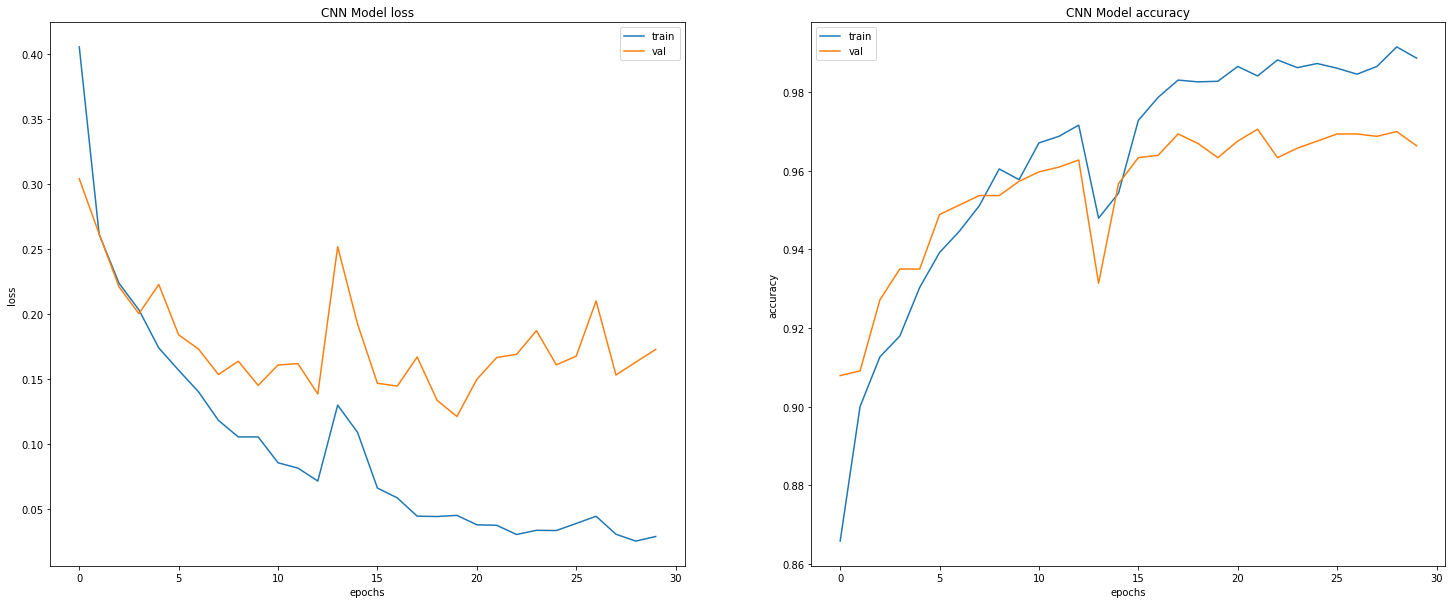

In [33]:
# plot the model accuracy and loss for the training and the validating set.
# CNN Model
from matplotlib import pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(25, 10))
ax = ax.ravel()

for i, met in enumerate(['loss', 'accuracy']):
    ax[i].plot(model_history.history[met])
    ax[i].plot(model_history.history['val_' + met])
    ax[i].set_title('CNN Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

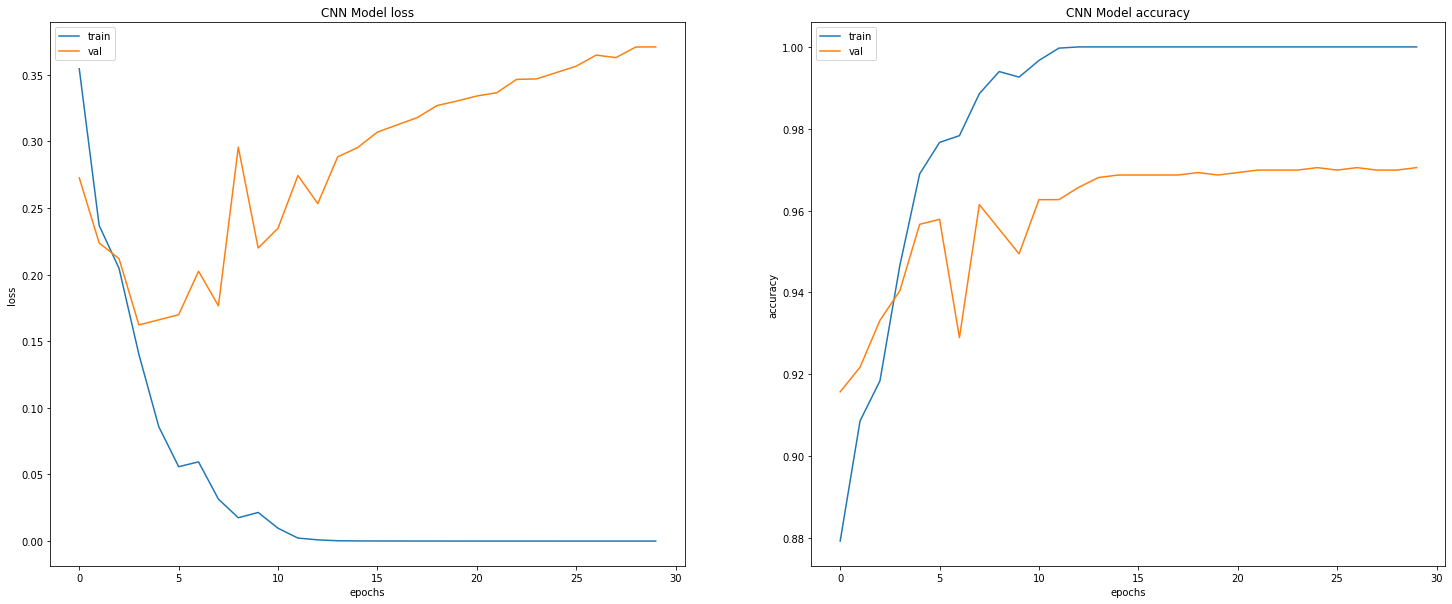

In [34]:
# plot the model accuracy and loss for the training and the validating set.
# CNN Model
from matplotlib import pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(25, 10))
ax = ax.ravel()

for i, met in enumerate(['loss', 'accuracy']):
    ax[i].plot(model_history2.history[met])
    ax[i].plot(model_history2.history['val_' + met])
    ax[i].set_title('CNN Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

# Confusion Matrix

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


31/31 [==============================] - 1s 20ms/step


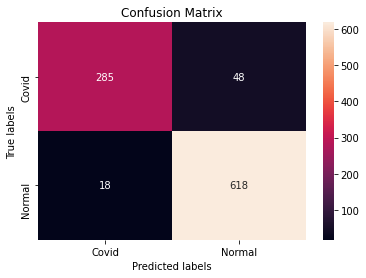

In [19]:
pred  = model.predict_classes(Xtest_norm,verbose= 1)

'''pred_normalized = []
for i in range(len(pred)):
  if(pred[i]<=0.5):
    pred_normalized.append(1)
  else:
    pred_normalized.append(0)
'''
import seaborn as sns

cm = confusion_matrix(ytest, pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Covid', 'Normal']); ax.yaxis.set_ticklabels(['Covid', 'Normal']);


In [20]:
TP = 285
TN = 618
FN = 18
FP = 48
total  = TP+TN+FN+FP

print("sensitivity(Recall)",TP/(TP+FN)*100)
print("Specificity",TN/(TN+FP)*100)
print("Precision",TP/(TP+FP)*100)

# When it's actually yes, how often does it predict yes
# (FP+FN)/total 
# equivalent to 1 minus Accuracy
# also known as "Error Rate"

Misclassification_Rate = (FP+FN)/total
print("Misclassification Rate",Misclassification_Rate)
 
# How often does the yes condition actually occur in our sample?
Prevalence = (FN+TP)/total
print("Prevalence",Prevalence*100)

sensitivity(Recall) 94.05940594059405
Specificity 92.7927927927928
Precision 85.58558558558559
Misclassification Rate 0.06811145510835913
Prevalence 31.269349845201237


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


31/31 [==============================] - 1s 21ms/step


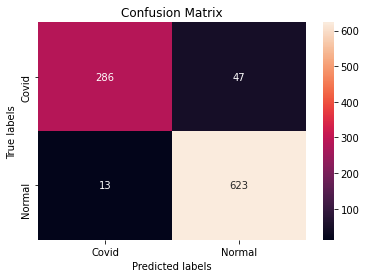

In [35]:
pred  = model2.predict_classes(Xtest_norm,verbose= 1)

'''pred_normalized = []
for i in range(len(pred)):
  if(pred[i]<=0.5):
    pred_normalized.append(1)
  else:
    pred_normalized.append(0)
'''
import seaborn as sns

cm = confusion_matrix(ytest, pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Covid', 'Normal']); ax.yaxis.set_ticklabels(['Covid', 'Normal']);


In [36]:
TP = 286
TN = 623
FN = 13
FP = 47
total  = TP+TN+FN+FP

print("sensitivity(Recall)",TP/(TP+FN)*100)
print("Specificity",TN/(TN+FP)*100)
print("Precision",TP/(TP+FP)*100)

# When it's actually yes, how often does it predict yes
# (FP+FN)/total 
# equivalent to 1 minus Accuracy
# also known as "Error Rate"

Misclassification_Rate = (FP+FN)/total
print("Misclassification Rate",Misclassification_Rate)
 
# How often does the yes condition actually occur in our sample?
Prevalence = (FN+TP)/total
print("Prevalence",Prevalence*100)

sensitivity(Recall) 95.65217391304348
Specificity 92.98507462686567
Precision 85.88588588588588
Misclassification Rate 0.06191950464396285
Prevalence 30.856553147574818


## Saving The Model

In [21]:
model_save_name = 'covid+nonCovid_COVIDx_DATASET_without_ImageDataGen_with_dropout.h5'
path = F"/content/gdrive/MyDrive/Temp/{model_save_name}" 
model.save(path)

In [37]:
model_save_name = 'covid+nonCovid_COVIDx_DATASET_without_ImageDataGen_without_dropout.h5'
path = F"/content/gdrive/MyDrive/Temp/{model_save_name}" 
model2.save(path)

# Loading the Model

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from tensorflow.keras.models import load_model

model = load_model('/content/gdrive/MyDrive/Temp/Model trained without ImageDataGenerator.h5')

# ROC

In [22]:
# ROC
from sklearn.metrics import roc_curve
y_pred_keras = model.predict(Xtest_norm).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(ytest, y_pred_keras)

# AUC
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

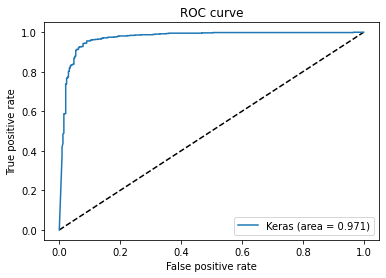

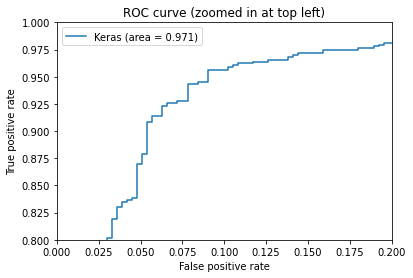

In [23]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

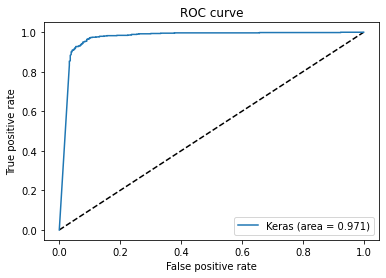

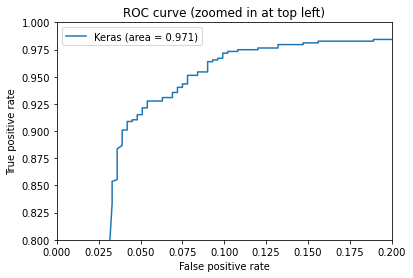

In [38]:
# ROC
from sklearn.metrics import roc_curve
y_pred_keras = model2.predict(Xtest_norm).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(ytest, y_pred_keras)

# AUC
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

# precision-recall curve and f1

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Logistic: f1=0.949 auc=0.982


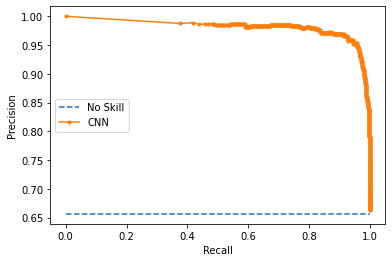

In [24]:



from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot

prob = model.predict_proba(Xtest_norm)

lr_precision, lr_recall, _ = precision_recall_curve(ytest, prob)
lr_f1, lr_auc = f1_score(ytest, pred), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(ytest[ytest==1]) / len(ytest)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='CNN')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Logistic: f1=0.954 auc=0.984


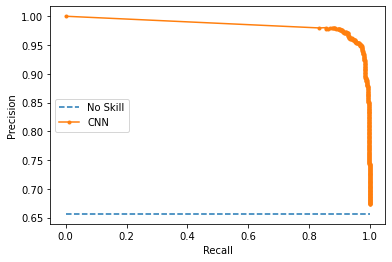

In [39]:


from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot

prob = model2.predict_proba(Xtest_norm)

lr_precision, lr_recall, _ = precision_recall_curve(ytest, prob)
lr_f1, lr_auc = f1_score(ytest, pred), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(ytest[ytest==1]) / len(ytest)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='CNN')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [40]:
from sklearn.metrics import precision_score,f1_score,recall_score
pred  = model.predict_classes(Xtest_norm,verbose= 1)
pr, f1, recal  = precision_score(ytest,pred), f1_score(ytest,pred), recall_score(ytest,pred)
print('Precision = %.3f \nF1 Score = %.3f \nRecall = %.3f' % (pr, f1, recal))

 1/31 [..............................] - ETA: 0s

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


31/31 [==============================] - 1s 19ms/step
Precision = 0.928 
F1 Score = 0.949 
Recall = 0.972


In [41]:
from sklearn.metrics import precision_score,f1_score,recall_score
pred  = model2.predict_classes(Xtest_norm,verbose= 1)
pr, f1, recal  = precision_score(ytest,pred), f1_score(ytest,pred), recall_score(ytest,pred)
print('Precision = %.3f \nF1 Score = %.3f \nRecall = %.3f' % (pr, f1, recal))

 1/31 [..............................] - ETA: 0s

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


31/31 [==============================] - 1s 17ms/step
Precision = 0.930 
F1 Score = 0.954 
Recall = 0.980


# classification_report

In [25]:
from sklearn.metrics import classification_report
print(classification_report(ytest, pred))
print('non covid = 1 , covid19 = 0')

              precision    recall  f1-score   support

         0.0       0.94      0.86      0.90       333
         1.0       0.93      0.97      0.95       636

    accuracy                           0.93       969
   macro avg       0.93      0.91      0.92       969
weighted avg       0.93      0.93      0.93       969

non covid = 1 , covid19 = 0


In [42]:
from sklearn.metrics import classification_report
print(classification_report(ytest, pred))
print('non covid = 1 , covid19 = 0')

              precision    recall  f1-score   support

         0.0       0.96      0.86      0.91       333
         1.0       0.93      0.98      0.95       636

    accuracy                           0.94       969
   macro avg       0.94      0.92      0.93       969
weighted avg       0.94      0.94      0.94       969

non covid = 1 , covid19 = 0


## K-Fold cross validation


In [43]:
# Model With Dropout Layer


def build_model():
  model = Sequential()

# add the convolutional layer
# filters, size of filters, padding, activation_function, inout_shape
  model.add(Conv2D(32,(5,5), padding = 'SAME', activation = 'relu', input_shape = (150,150,3)))

  # pooling layer
  model.add(MaxPooling2D(pool_size = (2,2)))

  # place a dropout layer
  model.add(Dropout(0.5)) ## Minimizes the overfitting

  # add another convolutional layer
  model.add(Conv2D(64,(5,5), padding = 'SAME', activation = 'relu'))

  # pooling layer
  model.add(MaxPooling2D(pool_size = (2,2)))

  # place a dropout layer
  model.add(Dropout(0.5))

  # Flatten the image to 1 dimensional array
  model.add(Flatten())

  # add a dense layer : amount of nodes, activation
  model.add(Dense(256, activation = 'relu'))

  # place a dropout layer
  # 0.5 drop out rate is recommended, half input will be dropped at each update
  model.add(Dropout(0.5))
  model.add(Dense(1, activation = 'sigmoid'))

  # compile model
  from tensorflow.keras.optimizers import Adam # Adam is optimizer
# Loss function definition
  model.compile(Adam(lr = 0.001),loss = 'binary_crossentropy', metrics = ['accuracy'])
  return model

In [ ]:
%%time

from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold, cross_val_score
import time


estimator= KerasClassifier(build_fn=build_model, epochs=30,verbose = 1)
kfold= KFold(n_splits=5,shuffle=True)
results= cross_val_score(estimator, X_train_norm, y_train, cv=kfold)
print("Accuracies per K-Fold ", results)
results.mean()

In [ ]:
print("Accuracies per K-Fold ", results)
results.mean()

Accuracies per K-Fold  [0.9632107  0.97324413 0.95652175 0.97315437 0.96644294]


0.966514778137207

In [ ]:
results.max()

0.9732441306114197

In [ ]:
results.min()

0.95652174949646

In [ ]:
results.std()

0.006326942597886905

In [ ]:
%%time
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_pred = cross_val_predict(estimator, Xtest_norm, ytest, cv=kfold)
conf_mat = confusion_matrix(ytest, y_pred)

Epoch 1/30
19/19 [==============================] - 1s 34ms/step - loss: 3.5706 - accuracy: 0.5873
Epoch 2/30
19/19 [==============================] - 1s 30ms/step - loss: 0.2972 - accuracy: 0.8666
Epoch 3/30
19/19 [==============================] - 1s 30ms/step - loss: 0.2039 - accuracy: 0.9185
Epoch 4/30
19/19 [==============================] - 1s 30ms/step - loss: 0.1738 - accuracy: 0.9368
Epoch 5/30
19/19 [==============================] - 1s 30ms/step - loss: 0.1515 - accuracy: 0.9446
Epoch 6/30
19/19 [==============================] - 1s 30ms/step - loss: 0.1774 - accuracy: 0.9131
Epoch 7/30
19/19 [==============================] - 1s 30ms/step - loss: 0.1372 - accuracy: 0.9490
Epoch 8/30
19/19 [==============================] - 1s 29ms/step - loss: 0.1466 - accuracy: 0.9505
Epoch 9/30
19/19 [==============================] - 1s 30ms/step - loss: 0.1327 - accuracy: 0.9522
Epoch 10/30
19/19 [==============================] - 1s 30ms/step - loss: 0.1352 - accuracy: 0.9460
Epoch 11/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/30
20/20 [==============================] - 1s 35ms/step - loss: 3.0861 - accuracy: 0.6023
Epoch 2/30
20/20 [==============================] - 1s 30ms/step - loss: 0.2994 - accuracy: 0.8938
Epoch 3/30
20/20 [==============================] - 1s 30ms/step - loss: 0.1790 - accuracy: 0.9122
Epoch 4/30
20/20 [==============================] - 1s 30ms/step - loss: 0.1536 - accuracy: 0.9467
Epoch 5/30
20/20 [==============================] - 1s 30ms/step - loss: 0.1686 - accuracy: 0.9461
Epoch 6/30
20/20 [==============================] - 1s 30ms/step - loss: 0.2041 - accuracy: 0.9358
Epoch 7/30
20/20 [==============================] - 1s 30ms/step - loss: 0.1633 - accuracy: 0.9341
Epoch 8/30
20/20 [==============================] - 1s 30ms/step - loss: 0.1448 - accuracy: 0.9457
Epoch 9/30
20/20 [==============================] - 1s 30ms/step - loss: 0.1847 - accuracy: 0.9445
Epoch 10/30
20/20 [==============================] - 1s 30ms/step - loss: 0.1244 - accuracy: 0.9547
Epoch 11/

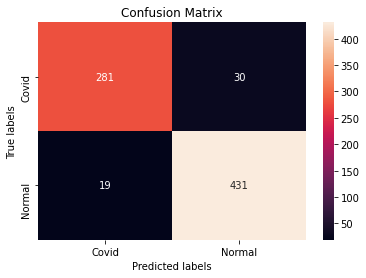

In [ ]:
ax= plt.subplot()
sns.heatmap(conf_mat, annot=True, fmt='g', ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Covid', 'Normal']); ax.yaxis.set_ticklabels(['Covid', 'Normal']);
